In [1]:
%load_ext rpy2.ipython

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
%%R 
library(fpp2)
library(ggplot2)
library(tseries)
library(xts)
library(lubridate)

R[write to console]: Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

R[write to console]: ── Attaching packages ────────────────────────────────────────────── fpp2 2.4 ──

R[write to console]: ✔ ggplot2   3.3.6      ✔ fma       2.4   
✔ forecast  8.17.0     ✔ expsmooth 2.3   

R[write to console]: 

R[write to console]: 
    ‘tseries’ version: 0.10-51

    ‘tseries’ is a package for time series analysis and computational
    finance.

    See ‘library(help="tseries")’ for details.


R[write to console]: Loading required package: zoo

R[write to console]: 
Attaching package: ‘zoo’


R[write to console]: The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


R[write to console]: 
Attaching package: ‘lubridate’


R[write to console]: The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




## ETS_log

### Price

In [3]:
%%R
raw = read.csv("final_daily.csv")
date_time = as_datetime(raw[,1])
price = xts( x = raw[,"price"], order.by = date_time) 
demand = xts( x = raw[,"demand"], order.by = date_time) 

demand_train = demand["2020/2021"]; demand_test = demand["2022"]
price_train = price["2020/2021"]; price_test = price["2022"]

price_train = log(price_train+5)
price_test=log(price_test+5)

In [4]:
%%R
out =  ets( price_train )
fit = ets( c(price_train, price_test), model = out )
summary(fit)
pred = tail( fitted(fit ), n = length(price_test) )

R[write to console]: Model is being refit with current smoothing parameters but initial states are being re-estimated.
Set 'use.initial.values=TRUE' if you want to re-use existing initial values.



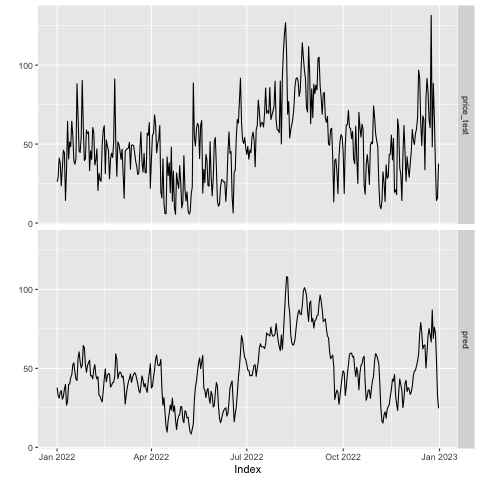

In [5]:
%%R
pred = exp(pred)
price_test = exp(price_test)
result= cbind(price_test,pred)
autoplot(result)

In [6]:
%%R
diff = result$price_test-result$pred
MSE = mean(diff^2)
MSE

[1] 286.8825


In [7]:
%%R
MAE=mean(abs(diff))
MAE

[1] 13.22523


In [8]:
%%R
error = abs(price_test-pred)/abs(price_test)
error[error > 1] = 1
mean(error)

[1] 0.314374


### Demand

In [9]:
%%R
out =  ets( log(demand_train) )
fit = ets( c(log(demand_train), log(demand_test)), model = out )
summary(fit)
pred = tail( fitted(fit ), n = length(demand_test) )

R[write to console]: Model is being refit with current smoothing parameters but initial states are being re-estimated.
Set 'use.initial.values=TRUE' if you want to re-use existing initial values.



In [10]:
%%R
pred = exp(pred)
result= cbind(demand_test,pred)
autoplot(result)
diff = result$demand_test-result$pred
MSE = mean(diff^2)
MSE

[1] 414561272


In [11]:
%%R
MAE=mean(abs(diff))
MAE

[1] 15270.61


In [12]:
%%R
error = abs(demand_test-pred)/abs(demand_test)
error[error > 1] = 1
mean(error)

[1] 0.04089592
